In [1]:
import numpy as np

# Malisiewicz et al.
def non_max_suppression_fast(boxes, overlapThresh):
	# if there are no boxes, return an empty list
	if len(boxes) == 0:
		return []

	# if the bounding boxes integers, convert them to floats --
	# this is important since we'll be doing a bunch of divisions
	if boxes.dtype.kind == "i":
		boxes = boxes.astype("float")

	# initialize the list of picked indexes	
	pick = []

	# grab the coordinates of the bounding boxes
	x1 = boxes[:,0]
	y1 = boxes[:,1]
	x2 = boxes[:,2]
	y2 = boxes[:,3]

	# compute the area of the bounding boxes and sort the bounding
	# boxes by the bottom-right y-coordinate of the bounding box
	area = (x2 - x1 + 1) * (y2 - y1 + 1)
	idxs = np.argsort(y2)

	# keep looping while some indexes still remain in the indexes
	# list
	while len(idxs) > 0:
		# grab the last index in the indexes list and add the
		# index value to the list of picked indexes
		last = len(idxs) - 1
		i = idxs[last]
		pick.append(i)

		# find the largest (x, y) coordinates for the start of
		# the bounding box and the smallest (x, y) coordinates
		# for the end of the bounding box
		xx1 = np.maximum(x1[i], x1[idxs[:last]])
		yy1 = np.maximum(y1[i], y1[idxs[:last]])
		xx2 = np.minimum(x2[i], x2[idxs[:last]])
		yy2 = np.minimum(y2[i], y2[idxs[:last]])

		# compute the width and height of the bounding box
		w = np.maximum(0, xx2 - xx1 + 1)
		h = np.maximum(0, yy2 - yy1 + 1)

		# compute the ratio of overlap
		overlap = (w * h) / area[idxs[:last]]

		# delete all indexes from the index list that have
		idxs = np.delete(idxs, np.concatenate(([last],
			np.where(overlap > overlapThresh)[0])))

	# return only the bounding boxes that were picked using the
	# integer data type
	return boxes[pick].astype("int")

In [7]:
# import the necessary packages
import numpy as np
import cv2

# construct a list containing the images that will be examined
# along with their respective bounding boxes
images = [
    ("images/zombies_01.jpg", np.array([
    (180, 72, 244, 136),
    (186, 72, 250, 136),
    (186, 78, 250, 142)])),
    ("images/zombies_02.jpg", np.array([
    (504, 306, 568, 370),
    (217, 150, 395, 328)])),
    ("images/sarah4.jpg", np.array([
    (66, 100, 244, 278),
    (83, 100, 261, 278),
    (66, 117, 244, 295),
    (83, 117, 261, 295),
    (66, 133, 244, 311),
    (83, 133, 261, 311)]))]

In [8]:
%matplotlib inline

In [13]:
import matplotlib.pyplot as plt
import cv2

images/sarah4.jpg
[x] 6 initial bounding boxes


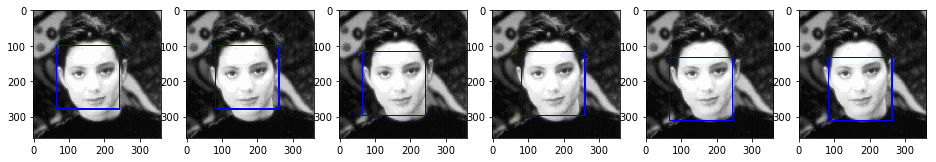

In [124]:
# change index from 0-2

index = 2

imagePath = images[index][0]
boundingBoxes = images[index][1]    
# load the image and clone it
print(imagePath)
print("[x] %d initial bounding boxes" % (len(boundingBoxes)))
image = cv2.imread('./non-max-suppression-fast/'+imagePath)
orig = image.copy()

f, ax = plt.subplots(1, len(boundingBoxes), figsize=(16,3))

# loop over the bounding boxes for each image and draw them
for i, (startX, startY, endX, endY) in enumerate(boundingBoxes):
    orig = image.copy()
    cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 0, 255), 2)
    ax[i].imshow(orig)

In [125]:
boxes = boundingBoxes
overlapThresh = 0.3

In [126]:
# if there are no boxes, return an empty list
if len(boxes) == 0:
    print("NoBoxes")

In [127]:
# if the bounding boxes integers, convert them to floats --
# this is important since we'll be doing a bunch of divisions
if boxes.dtype.kind == "i":
    boxes = boxes.astype("float")
    print("convert to float")

convert to float


In [128]:
# initialize the list of picked indexes	
pick = []

In [129]:
# grab the coordinates of the bounding boxes
x1 = boxes[:,0]
y1 = boxes[:,1]
x2 = boxes[:,2]
y2 = boxes[:,3]

In [130]:
boxes

array([[  66.,  100.,  244.,  278.],
       [  83.,  100.,  261.,  278.],
       [  66.,  117.,  244.,  295.],
       [  83.,  117.,  261.,  295.],
       [  66.,  133.,  244.,  311.],
       [  83.,  133.,  261.,  311.]])

In [131]:
x1

array([ 66.,  83.,  66.,  83.,  66.,  83.])

In [132]:
y1

array([ 100.,  100.,  117.,  117.,  133.,  133.])

In [133]:
x2

array([ 244.,  261.,  244.,  261.,  244.,  261.])

In [134]:
y2

array([ 278.,  278.,  295.,  295.,  311.,  311.])

In [135]:
# compute the area of the bounding boxes and sort the bounding
# boxes by the bottom-right y-coordinate of the bounding box
area = (x2 - x1 + 1) * (y2 - y1 + 1)
idxs = np.argsort(y2)

In [136]:
idxs

array([0, 1, 2, 3, 4, 5])

In [137]:
# keep looping while some indexes still remain in the indexes
# list
while len(idxs) > 0:
    # grab the last index in the indexes list and add the
    # index value to the list of picked indexes
    
    last = len(idxs) - 1
    i = idxs[last]
    pick.append(i)
    
    print("idxs len:", len(idxs), "last:", last, "i:", i, "pick:", pick)
    
    # find the largest (x, y) coordinates for the start of
    # the bounding box and the smallest (x, y) coordinates
    # for the end of the bounding box
    xx1 = np.maximum(x1[i], x1[idxs[:last]])
    yy1 = np.maximum(y1[i], y1[idxs[:last]])
    xx2 = np.minimum(x2[i], x2[idxs[:last]])
    yy2 = np.minimum(y2[i], y2[idxs[:last]])

    print("xx1:", xx1, "x1[i]", x1[i], "x1[idxs[:last]]", x1[idxs[:last]])
    print("yy1:", yy1, "y1[i]", y1[i], "y1[idxs[:last]]", y1[idxs[:last]])
    print("xx2:", xx2, "x2[i]", x2[i], "x2[idxs[:last]]", x2[idxs[:last]])
    print("yy2:", yy1, "y2[i]", y2[i], "y2[idxs[:last]]", y2[idxs[:last]])
    
    # compute the width and height of the bounding box
    w = np.maximum(0, xx2 - xx1 + 1)
    h = np.maximum(0, yy2 - yy1 + 1)

    # compute the ratio of overlap
    overlap = (w * h) / area[idxs[:last]]
    
    print("overlap:", overlap)

    # delete all indexes from the index list that have
    idxs = np.delete(idxs, np.concatenate(([last],
        np.where(overlap > overlapThresh)[0])))

idxs len: 6 last: 5 i: 5 pick: [5]
xx1: [ 83.  83.  83.  83.  83.] x1[i] 83.0 x1[idxs[:last]] [ 66.  83.  66.  83.  66.]
yy1: [ 133.  133.  133.  133.  133.] y1[i] 133.0 y1[idxs[:last]] [ 100.  100.  117.  117.  133.]
xx2: [ 244.  261.  244.  261.  244.] x2[i] 261.0 x2[idxs[:last]] [ 244.  261.  244.  261.  244.]
yy2: [ 133.  133.  133.  133.  133.] y2[i] 311.0 y2[idxs[:last]] [ 278.  278.  295.  295.  311.]
overlap: [ 0.73817921  0.81564246  0.82413158  0.91061453  0.90502793]


In [138]:
# return only the bounding boxes that were picked using the
# integer data type
boxes[pick].astype("int32")

array([[ 83, 133, 261, 311]], dtype=int32)

In [139]:
# perform non-maximum suppression on the bounding boxes
print("[x] after applying non-maximum, %d bounding boxes" % (len(pick)))

[x] after applying non-maximum, 1 bounding boxes


In [140]:
boxes[pick]

array([[  83.,  133.,  261.,  311.]])

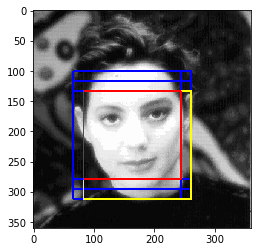

In [144]:
# loop over the picked bounding boxes and draw them
for i, (startX, startY, endX, endY) in enumerate(boundingBoxes):
    cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 0, 255), 2)

for (startX, startY, endX, endY) in boxes[pick].astype("int32"):
    cv2.rectangle(orig, (startX, startY), (endX, endY), (255, 255, 0), 2)
    cv2.rectangle(orig, (int(xx1[0]), int(yy1[0])), (int(xx2[0]), int(yy2[0])), (255, 0, 0), 2)

plt.imshow(orig)